# Exercise: Breast Cancer Dataset
The breast cancer dataset is a classic and very easy binary classification dataset.



Our main objectives for this dataset are:
1. Load the  dataset into a pandas dataframe
2. Create a table summary of the features and target values
3. Create a histogram of all the features and target
4. Create a correlation matrix of the features and target
5. Create scatter plots of all the features and target

In [1]:
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from autogluon.tabular import TabularPredictor

In [2]:
Breast_cancer=datasets.load_breast_cancer()

In [6]:
Breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
BS_data=Breast_cancer["data"] #Breast_cancer.data
BS_data
#BS_data.shape #(569, 30)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
BS_data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [5]:
F_N=Breast_cancer.feature_names
F_N

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
Target=Breast_cancer.target
print(Target.shape)

(569,)


In [8]:
BC_DF=pd.DataFrame(BS_data, columns=F_N)
#BC_DF

In [9]:
BC_DF["Output"]=Target

In [10]:
# Check your dataframe by `.head()`
BC_DF.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [11]:
#ToDo: Mention how many datapoints hold target value of zero and one
print(f"Number of Malignant samples {(BC_DF["Output"]==0).sum()}") #Malignant
print(f"Number of Benign samples    {(BC_DF["Output"]==1).sum()}") #Benign
#or
print(len(BC_DF[BC_DF["Output"]==0]))

Number of Malignant samples 212
Number of Benign samples    357
212


In [12]:
#ToDo: Find min, max, mean values of each feature along with standard deviation 
# Simple table summary
BC_DF.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
#ToDo: Find data types for each feature and if each has null values
BC_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<Axes: title={'center': 'mean radius'}>]], dtype=object)

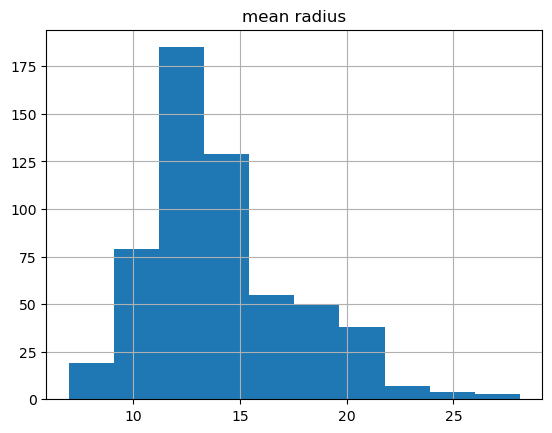

In [14]:
# Histogram to show all the data distributions including the target
%matplotlib inline
BC_DF.hist("mean radius")

<Axes: >

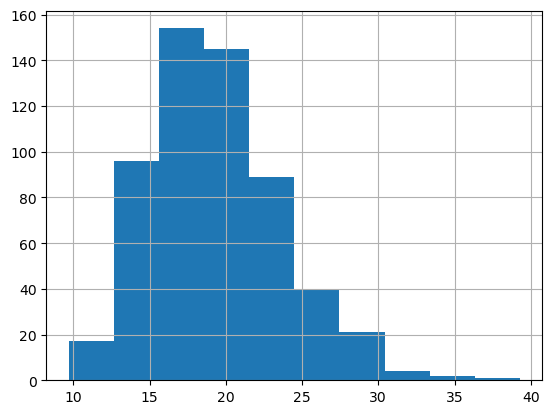

In [15]:
BC_DF["mean texture"].hist()

In [16]:
# ToDo: Investigate to see if any data are correlated positively or negatively using kendall correlation
Corr_mat=BC_DF.corr(method = "kendall")
Corr_mat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
mean radius,1.000000,0.229159,0.963320,0.985565,0.099549,0.340020,0.465087,0.566917,0.081502,-0.246220,...,0.210302,0.862763,0.882035,0.082284,0.332970,0.421100,0.532569,0.114141,0.024103,-0.599082
mean texture,0.229159,1.000000,0.234353,0.230829,0.017135,0.184220,0.236079,0.209629,0.075493,-0.039255,...,0.741293,0.254406,0.248096,0.069336,0.199777,0.235242,0.217743,0.081482,0.078289,-0.377644
mean perimeter,0.963320,0.234353,1.000000,0.956965,0.122434,0.375540,0.497587,0.596716,0.101781,-0.214661,...,0.216032,0.881245,0.885246,0.102428,0.365026,0.449549,0.559819,0.130283,0.053103,-0.611775
mean area,0.985565,0.230829,0.956965,1.000000,0.092541,0.333534,0.461843,0.561760,0.076963,-0.252131,...,0.212051,0.863409,0.885906,0.077793,0.328257,0.418822,0.528375,0.112032,0.020265,-0.599992
mean smoothness,0.099549,0.017135,0.122434,0.092541,1.000000,0.491072,0.364105,0.398511,0.381515,0.417070,...,0.041361,0.152343,0.128881,0.608475,0.335814,0.300847,0.349195,0.270602,0.357792,-0.304033
mean compactness,0.340020,0.184220,0.375540,0.333534,0.491072,1.000000,0.719194,0.653022,0.392366,0.345923,...,0.174449,0.412628,0.363980,0.412274,0.724842,0.647942,0.633090,0.312991,0.498231,-0.497971
mean concavity,0.465087,0.236079,0.497587,0.461843,0.364105,0.719194,1.000000,0.775266,0.311354,0.173476,...,0.227797,0.531750,0.488281,0.338902,0.654070,0.787870,0.734047,0.263490,0.377455,-0.599449
mean concave points,0.566917,0.209629,0.596716,0.561760,0.398511,0.653022,0.775266,1.000000,0.291970,0.094885,...,0.200509,0.620728,0.583169,0.339906,0.557303,0.635728,0.783933,0.240447,0.285028,-0.635873
mean symmetry,0.081502,0.075493,0.101781,0.076963,0.381515,0.392366,0.311354,0.291970,1.000000,0.297681,...,0.081521,0.129378,0.104677,0.291003,0.308333,0.275028,0.276077,0.520061,0.281841,-0.271924
mean fractal dimension,-0.246220,-0.039255,-0.214661,-0.252131,0.417070,0.345923,0.173476,0.094885,0.297681,1.000000,...,-0.031406,-0.174835,-0.215901,0.348018,0.274333,0.162783,0.092549,0.204803,0.566543,0.021173


### Task 5 Check for Null values

In [17]:
#ToDo: Check for null Value in the dataframe
null_columns = BC_DF.columns[BC_DF.isnull().any()]
null_columns


Index([], dtype='object')

In [18]:
#Check for null Value in the dataframe
print(BC_DF.isnull().sum().values.any()) 
print(BC_DF.isnull().sum().any())
print(BC_DF.isnull().values.any())  

False
False
False


## Use RidgeClassifier on Original dataset

In [19]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier


X_train, X_test, y_train, y_test = train_test_split( 
    Breast_cancer["data"], Breast_cancer["target"], test_size=0.3, random_state=42)

clf = RidgeClassifier().fit(X_train, y_train)

In [20]:
# Score Returns the mean accuracy on the given test data and labels.
clf.score(X_train, y_train)

0.9522613065326633

In [21]:
y_pred=clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9649122807017544

## Autogluon


In [26]:
#Create training dataframe
BC_train = pd.DataFrame(X_train, columns=F_N)
BC_train["Output"]=y_train
#Create testing dataframe
BC_test = pd.DataFrame(X_test, columns=F_N)
BC_test["Output"] = y_test

In [27]:
BC_train.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014,1
1,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628,1
2,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208,1
3,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949,1
4,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953,1


In [28]:
BC_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [ ]:
#create an autogluon tabular predictor
label ="Output"
predictor = TabularPredictor(
    label=label, 
    eval_metric = 'accuracy',
    verbosity=0,
).fit(
    train_data=BC_train,
    time_limit=200, 
    presets="best_quality"
)

2025-05-27 16:43:23,425	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-27 16:43:29,221	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


In [30]:
!pip install -U ipywidgets

   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.8 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.8 kB 495.5 kB/s eta 0:00:01
   ------------------------- ------------- 92.2/139.8 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 139.8/139.8 kB 925.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/216.6 kB ? eta -:--:--
   ---------------------- ----------------- 122.9/216.6 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------  215.0/216.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  215.0/216.6 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 216.6/216.6 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.2 MB 6.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/2.2 MB 3.0 MB/s eta 0:00:01
   --

In [31]:
predictor.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1   0.979899    accuracy       0.012960  22.972573                0.012960          22.972573            1       True          3
1    WeightedEnsemble_L2   0.979899    accuracy       0.013958  23.017452                0.000997           0.044880            2       True          5
2    WeightedEnsemble_L3   0.979899    accuracy       0.013959  23.007479                0.000998           0.034907            3       True          6
3        LightGBM_BAG_L1   0.969849    accuracy       0.013967  83.117001                0.013967          83.117001            1       True          4
4  KNeighborsDist_BAG_L1   0.899497    accuracy       0.000998   0.007978                0.000998           0.007978            1       True          2
5  KNeighborsUnif_BAG_L1  

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.8994974874371859,
  'KNeighborsDist_BAG_L1': 0.8994974874371859,
  'LightGBMXT_BAG_L1': 0.9798994974874372,
  'LightGBM_BAG_L1': 0.9698492462311558,
  'WeightedEnsemble_L2': 0.9798994974874372,
  'WeightedEnsemble_L3': 0.9798994974874372},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'KNeighborsUn

In [ ]:
predictions = predictor.predict(BC_test)


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9766081871345029

In [ ]:
performance = predictor.evaluate(BC_test)
print(performance)

{'accuracy': 0.9766081871345029, 'balanced_accuracy': 0.9715608465608465, 'mcc': 0.9497047862559932, 'roc_auc': 0.9979423868312758, 'f1': 0.981651376146789, 'precision': 0.9727272727272728, 'recall': 0.9907407407407407}


### Tasks

#### Task1


Check the documentation for the available presets in `TabularPredictor.fit()`.

Train two predictors using different presets (e.g., "best_quality" vs "medium_quality") and compare:

- Accuracy on validation set

In [45]:
label = "Output"
predictor_medium = TabularPredictor(label=label).fit(
    train_data= BC_train,
    presets='medium_quality',
    time_limit=200  # optional: add a time limit if desired
)


No path specified. Models will be saved in: "AutogluonModels\ag-20250527_141051"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          4
Memory Avail:       1.95 GB / 15.86 GB (12.3%)
Disk Space Avail:   107.23 GB / 136.72 GB (78.4%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "d:\Udacity mentor\AWS 2025\Weekly sessions\Session#2\Notebooks\AutogluonModels\ag-20250527_141051"
Train Data Rows:    398
Train Data Columns: 30
Label Column:       Output
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type a

In [48]:
performance_medium_quality = predictor_medium.evaluate(BC_test)
print(performance_medium_quality)

{'accuracy': 0.9707602339181286, 'balanced_accuracy': 0.9636243386243386, 'mcc': 0.9372193798039847, 'roc_auc': 0.9977954144620811, 'f1': 0.9771689497716894, 'precision': 0.963963963963964, 'recall': 0.9907407407407407}


In [46]:

predictor_best = predictor

In [49]:
performance_best_quality = predictor_best.evaluate(BC_test)
print(performance_best_quality)

{'accuracy': 0.9766081871345029, 'balanced_accuracy': 0.9715608465608465, 'mcc': 0.9497047862559932, 'roc_auc': 0.9979423868312758, 'f1': 0.981651376146789, 'precision': 0.9727272727272728, 'recall': 0.9907407407407407}


#### Task2

- Look in the documentation for how to set eval_metric in TabularPredictor. Try using:
- roc_auc for binary classification


In [50]:

#create an autogluon tabular predictor
label ="Output"
predictor = TabularPredictor(
    label=label, 
    eval_metric = 'roc_auc',
    verbosity=0,
).fit(
    train_data=BC_train,
    time_limit=200, 
    presets="best_quality"
)

In [51]:
performance = predictor.evaluate(BC_test)
print(performance)

{'roc_auc': 0.9973544973544974, 'accuracy': 0.9824561403508771, 'balanced_accuracy': 0.9794973544973544, 'mcc': 0.9622529912686459, 'f1': 0.9861751152073732, 'precision': 0.981651376146789, 'recall': 0.9907407407407407}


#### Tas3

- After training a model, use `.feature_importance()` to analyze top contributing features.
- Write a short interpretation of the top 5 features.

In [ ]:

predictor.feature_importance(BC_train)

,importance,stddev,p_value,n,p99_high,p99_low
worst concave points,0.020603,0.003727,0.000123,5,0.028276,0.012930
worst texture,0.013065,0.005149,0.002381,5,0.023668,0.002463
mean concave points,0.010050,0.002513,0.000432,5,0.015224,0.004877
worst area,0.009045,0.006306,0.016339,5,0.022030,-0.003940
worst radius,0.007035,0.004495,0.012448,5,0.016290,-0.002219
mean texture,0.005025,0.003077,0.010871,5,0.011361,-0.001311
worst perimeter,0.005025,0.002513,0.005528,5,0.010199,-0.000148
worst concavity,0.003518,0.002247,0.012448,5,0.008145,-0.001110
symmetry error,0.002513,0.002513,0.044505,5,0.007686,-0.002661
worst smoothness,0.002513,0.000000,0.500000,5,0.002513,0.002513


####